# Task for Today  

***

## Credit Card Default Prediction  

Given *data about credit card clients*, let's try to predict whether a given client will **default** or not.  
  
We will use logistic regression, support vector machine, and neural network models to make our predictions.

# Getting Started

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
data = pd.read_excel("default of credit card clients.xls", header=1)

In [7]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# Visualization

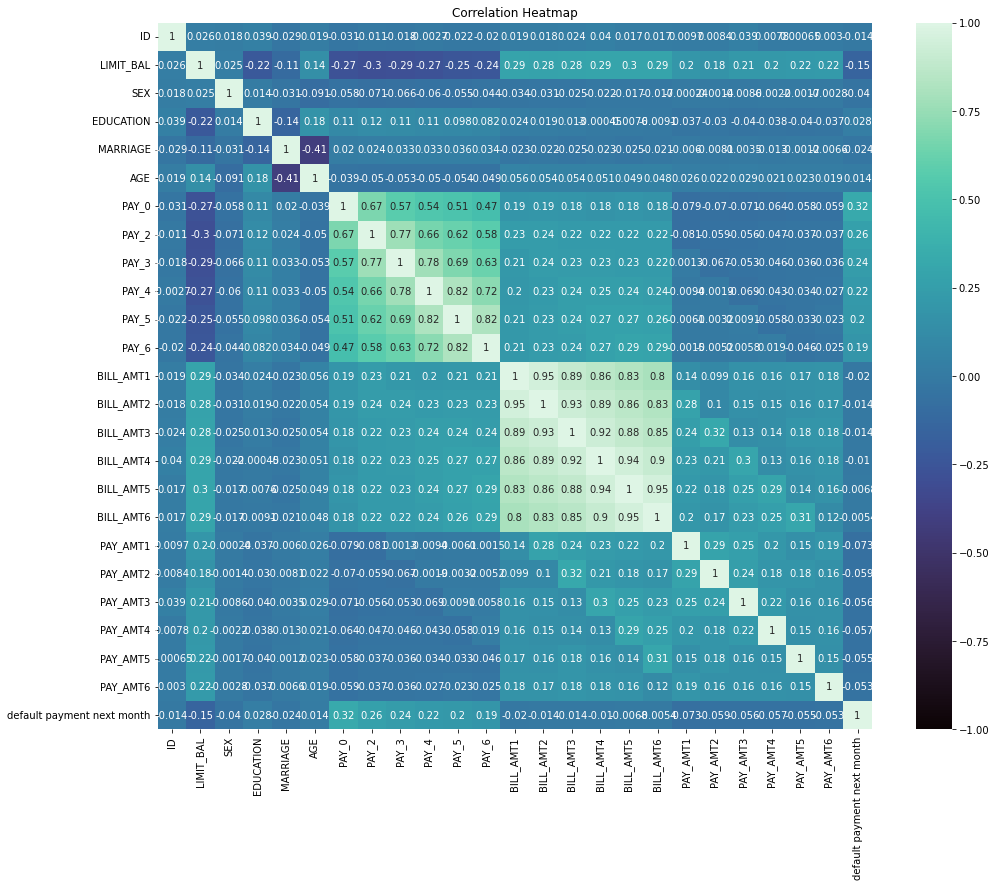

In [9]:
corr = data.corr()
plt.figure(figsize=(16, 13))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing

In [10]:
{'EDUCATION': 'EDU'}.items()

dict_items([('EDUCATION', 'EDU')])

In [11]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [12]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID
    df = df.drop('ID', axis=1)
    
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    # Split df into X and y
    #y = df['default.payment.next.month'].copy()
    y = df['default payment next month'].copy()
    X = df.drop('default payment next month', axis=1).copy()
    #X = df.drop('default.payment.next.month', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [13]:
X, y = preprocess_inputs(data)

In [14]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [15]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [16]:
{column: len(X[column].unique()) for column in X.columns}

{'LIMIT_BAL': 81,
 'SEX': 2,
 'AGE': 56,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'EDU_0': 2,
 'EDU_1': 2,
 'EDU_2': 2,
 'EDU_3': 2,
 'EDU_4': 2,
 'EDU_5': 2,
 'EDU_6': 2,
 'MAR_0': 2,
 'MAR_1': 2,
 'MAR_2': 2,
 'MAR_3': 2}

# Training

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [18]:
# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[-0.07391066 -0.06560366  0.04594474  0.62643679  0.09439256  0.09760826
  -0.00669273  0.04729133  0.04005348 -0.44708577  0.16862924  0.08105853
   0.08402481  0.08488268 -0.05676865 -0.21457128 -0.25493799 -0.1067462
  -0.06520911 -0.0171216  -0.04046545 -0.13131492  0.03887616 -0.00378487
   0.00351637 -0.0587529  -0.11357256 -0.01162902 -0.02901006  0.04457416
  -0.04294613  0.00446232]]


[[0.88733199 0.11266801]
 [0.76115198 0.23884802]
 [0.4939395  0.5060605 ]
 ...
 [0.50378583 0.49621417]
 [0.87468848 0.12531152]
 [0.85198579 0.14801421]]
0.8151666666666667


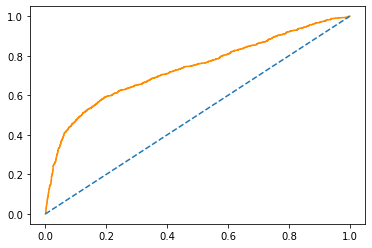

0.7336868409088534

In [19]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)
print(preds)
# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)
auc

# Neural Networks

In [24]:
import keras
import tensorflow as tf

#This stuff should help simpify writing later on down the line
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [21]:
#First, create the model
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(32,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Now, compile the model
model.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [23]:
#We are ready to train the model!
n_epochs = 100
batch_size = 512
X_train, X_test, y_train, y_test
history = model.fit(X_train, y_train,
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_test, y_test))

Epoch 1/100
47/47 [==============================] - 1s 8ms/step - loss: 0.5044 - accuracy: 0.7959 - val_loss: 0.4638 - val_accuracy: 0.8087
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8106 - val_loss: 0.4468 - val_accuracy: 0.8160
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8151 - val_loss: 0.4430 - val_accuracy: 0.8180
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8166 - val_loss: 0.4380 - val_accuracy: 0.8183
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8170 - val_loss: 0.4364 - val_accuracy: 0.8208
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.8192 - val_loss: 0.4356 - val_accuracy: 0.8200
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.8195 - val_loss: 0.4336 - val_accuracy: 0.8202
Epoch 8/100
4